In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing libraries**

In [ ]:
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]

!jupyter nbextension enable --py widgetsnbextension

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import math

<ipython-input-3-fc3310ba3af3>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
df=pd.read_csv(f'/content/drive/MyDrive/ML DATASETS/BRFSS22Cleaned.csv')

# **1. PRE PROCESSING**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281116 entries, 0 to 281115
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DiabetesBinary        281116 non-null  float64
 1   BMI                   281116 non-null  float64
 2   Smoker                281116 non-null  float64
 3   Depression            281116 non-null  float64
 4   Stroke                281116 non-null  float64
 5   HeartDiseaseorAttack  281116 non-null  float64
 6   RoutineCheckupSpan    281116 non-null  float64
 7   PhysActivity          281116 non-null  int64  
 8   SleepTime             281116 non-null  float64
 9   HvyAlcoholConsump     281116 non-null  int64  
 10  AnyHealthcare         281116 non-null  int64  
 11  NoDocbcCost           281116 non-null  float64
 12  GenHlth               281116 non-null  float64
 13  MentHlth              281116 non-null  float64
 14  PhysHlth              281116 non-null  float64
 15  

**1.1 changing data type into int**

In [6]:
df=df.astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281116 entries, 0 to 281115
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   DiabetesBinary        281116 non-null  int64
 1   BMI                   281116 non-null  int64
 2   Smoker                281116 non-null  int64
 3   Depression            281116 non-null  int64
 4   Stroke                281116 non-null  int64
 5   HeartDiseaseorAttack  281116 non-null  int64
 6   RoutineCheckupSpan    281116 non-null  int64
 7   PhysActivity          281116 non-null  int64
 8   SleepTime             281116 non-null  int64
 9   HvyAlcoholConsump     281116 non-null  int64
 10  AnyHealthcare         281116 non-null  int64
 11  NoDocbcCost           281116 non-null  int64
 12  GenHlth               281116 non-null  int64
 13  MentHlth              281116 non-null  int64
 14  PhysHlth              281116 non-null  int64
 15  DiffWalk              281116 non-n

**1.2 HANDLING DUPLICATES (if any)**

In [8]:
duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))

Duplicate Rows :  27325


In [9]:
#Removing duplicate rows
df.drop_duplicates(inplace = True)

In [10]:
df.shape


(253791, 20)

In [11]:
df['DiabetesBinary'].value_counts()

0    216154
1     37637
Name: DiabetesBinary, dtype: int64

**1.3 Checking Outliers**

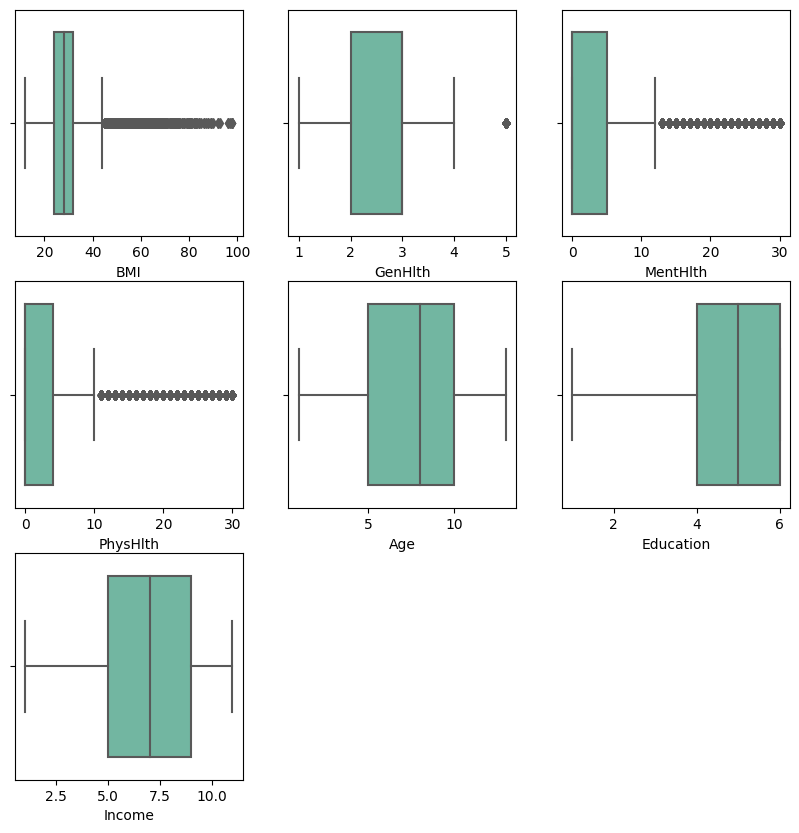

In [12]:
plt.figure(figsize = (10,10))
for i,col in enumerate(['BMI','GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education','Income']):
  #remaining column's are not done since they are 0/1 values
    plt.subplot(3,3,i+1)
    sns.boxplot(x = col, data = df ,palette='Set2')
plt.show()

*Hence, there are no outliers*

## **2. ANALYSIS**

**2.1 Profile Report**

In [13]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**2.1.1 CONCLUSIONS FROM ABOVE**

**Correlation from above profile report shows the relations between columns**

* GenHlth and PhysHlth are highly correleted with each other.(positive relation) with value 0.49
* GenHlth and Income are highly correleted with each other .(negetive relation) with value -0.3


**No Missing values**

**No duplicate records**

**EXTRA :-**
* Stroke is highly imbalanced (73.5%)
* HeartDiseaseorAttack is highly imbalanced (54.0%)
* SleepTime is highly imbalanced (53.8%)
* HvyAlcoholConsump is highly imbalanced (60.1%)
* AnyHealthcare is highly imbalanced (71.5%)
* NoDocbcCost is highly imbalanced (57.3%)
* MentHlth has 141034 (55.6%) zeros
* PhysHlth has 145841 (57.5%) zeros

**About Variables**

* Some of them are continuous and Some of them are discrete
* Some of them are categorical and some of them are real numbers


**2.2 Correlation between features and Diabetes Binary**

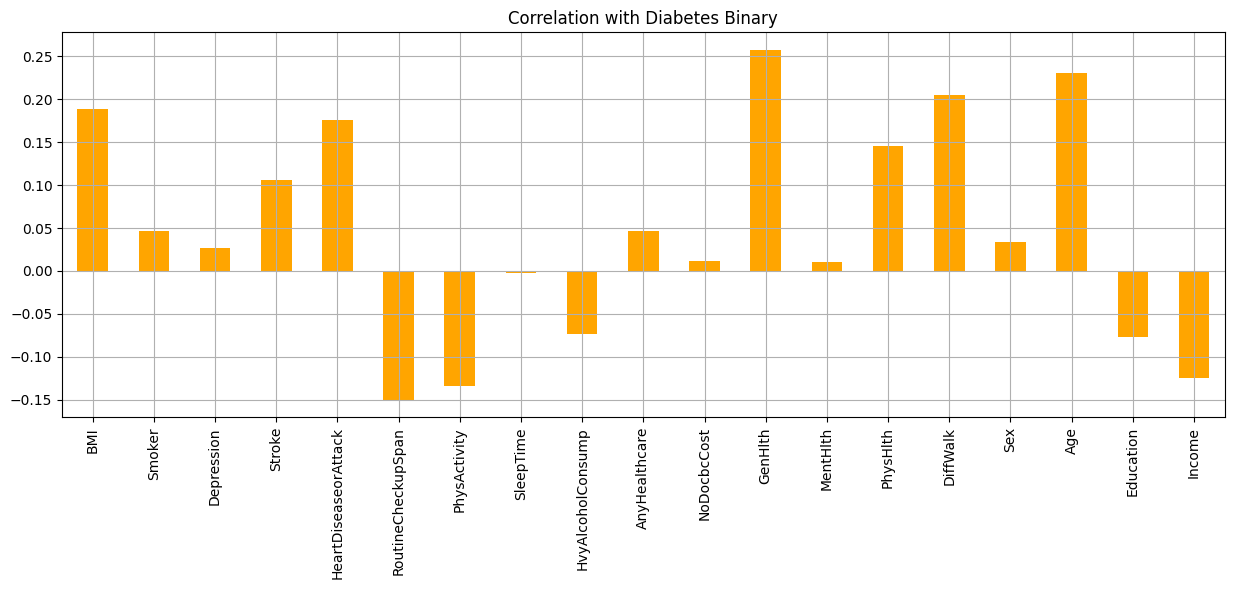

In [14]:

df.drop('DiabetesBinary', axis=1).corrwith(df.DiabetesBinary).plot(kind='bar', grid=True, figsize=(15, 5)
, title="Correlation with Diabetes Binary",color="Orange");

**2.2.1 DiabetesBinary's relation with other features Through bar Graph Result:**

* Smoker, AnyHealthcare,SleepTime , NoDocbccost,MentHlth and sex are least correlated with Diabetes_binary.

* BMI , stroke , HeartDiseaseorAttack ,RoutineCheckupSpan, PhysActivity ,  HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

# **3. Relation Between Diabetes Binary and important features which causes Diabetes**

 Adding a DiabetesBinaryStr column  , Non-Diabetic for 0 and Diabetic for 1 diabetesBinary

In [15]:
df["DiabetesBinaryStr"]= df["DiabetesBinary"].replace({0:"NOn-Diabetic",1:"Diabetic"})

In [16]:
df1=df.copy()

Let's change name of values so that it would be clear to analyse

In [17]:

df1.Age[df1['Age'] == 1] = '18 to 24'
df1.Age[df1['Age'] == 2] = '25 to 29'
df1.Age[df1['Age'] == 3] = '30 to 34'
df1.Age[df1['Age'] == 4] = '35 to 39'
df1.Age[df1['Age'] == 5] = '40 to 44'
df1.Age[df1['Age'] == 6] = '45 to 49'
df1.Age[df1['Age'] == 7] = '50 to 54'
df1.Age[df1['Age'] == 8] = '55 to 59'
df1.Age[df1['Age'] == 9] = '60 to 64'
df1.Age[df1['Age'] == 10] = '65 to 69'
df1.Age[df1['Age'] == 11] = '70 to 74'
df1.Age[df1['Age'] == 12] = '75 to 79'
df1.Age[df1['Age'] == 13] = '80 or older'

df1.DiabetesBinary[df1['DiabetesBinary'] == 0] = 'No Diabetes'
df1.DiabetesBinary[df1['DiabetesBinary'] == 1] = 'Diabetes'


df1.Stroke[df1['Stroke'] == 0] = 'No'
df1.Stroke[df1['Stroke'] == 1] = 'Yes'

df1.HeartDiseaseorAttack[df1['HeartDiseaseorAttack'] == 0] = 'No'
df1.HeartDiseaseorAttack[df1['HeartDiseaseorAttack'] == 1] = 'Yes'


df1.RoutineCheckupSpan[df1['RoutineCheckupSpan'] == 1] = 'Within past year '
df1.RoutineCheckupSpan[df1['RoutineCheckupSpan'] == 2] = 'Within past 2 years'
df1.RoutineCheckupSpan[df1['RoutineCheckupSpan'] == 3] = 'Within past 5 years'
df1.RoutineCheckupSpan[df1['RoutineCheckupSpan'] == 4] = '5 or more years'


df1.PhysActivity[df1['PhysActivity'] == 0] = 'No'
df1.PhysActivity[df1['PhysActivity'] == 1] = 'Yes'



df1.HvyAlcoholConsump[df1['HvyAlcoholConsump'] == 0] = 'No'
df1.HvyAlcoholConsump[df1['HvyAlcoholConsump'] == 1] = 'Yes'

df1.AnyHealthcare[df1['AnyHealthcare'] == 0] = 'No'
df1.AnyHealthcare[df1['AnyHealthcare'] == 1] = 'Yes'

df1.NoDocbcCost[df1['NoDocbcCost'] == 0] = 'No'
df1.NoDocbcCost[df1['NoDocbcCost'] == 1] = 'Yes'

df1.GenHlth[df1['GenHlth'] == 1] = 'Excellent'
df1.GenHlth[df1['GenHlth'] == 2] = 'Very Good'
df1.GenHlth[df1['GenHlth'] == 3] = 'Good'
df1.GenHlth[df1['GenHlth'] == 4] = 'Fair'
df1.GenHlth[df1['GenHlth'] == 5] = 'Poor'

df1.DiffWalk[df1['DiffWalk'] == 0] = 'No'
df1.DiffWalk[df1['DiffWalk'] == 1] = 'Yes'

df1.Sex[df1['Sex'] == 0] = 'Female'
df1.Sex[df1['Sex'] == 1] = 'Male'

df1.Education[df1['Education'] == 1] = 'Never Attended School'
df1.Education[df1['Education'] == 2] = 'Grades 1 through 8'
df1.Education[df1['Education'] == 3] = 'Grades 9 through 11'
df1.Education[df1['Education'] == 4] = 'Grade 12 or GED'
df1.Education[df1['Education'] == 5] = 'College 1 year to 3 years'
df1.Education[df1['Education'] == 6] = 'College 4 yr'

df1.Income[df1['Income'] == 1] = 'Less Than $10,000'
df1.Income[df1['Income'] == 2] = '$10,000 to $15,000 '
df1.Income[df1['Income'] == 3] = '$15,000 to  $20,000'
df1.Income[df1['Income'] == 4] = '$20,000 to  $25,000'
df1.Income[df1['Income'] == 5] = '$25,000 to  $35,000'
df1.Income[df1['Income'] == 6] = '$35,000 to  $50,000'
df1.Income[df1['Income'] == 7] = '$50,000 to  $75,000'
df1.Income[df1['Income'] == 8] = '$75,000 to  $100,000'
df1.Income[df1['Income'] == 9] = '$100,000 to $150,000'
df1.Income[df1['Income'] == 10] = '$150,000 to  $200,000'
df1.Income[df1['Income'] == 11] = '$200,000 or more'



<ipython-input-17-4c47c4f98957>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Age[df1['Age'] == 1] = '18 to 24'
<ipython-input-17-4c47c4f98957>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.DiabetesBinary[df1['DiabetesBinary'] == 0] = 'No Diabetes'
<ipython-input-17-4c47c4f98957>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Stroke[df1['Stroke'] == 0] = 'No'
<ipython-input-17-4c47c4f98957>:22: SettingWithCopyWarn

**3.1 Age and Diabetes Binary**

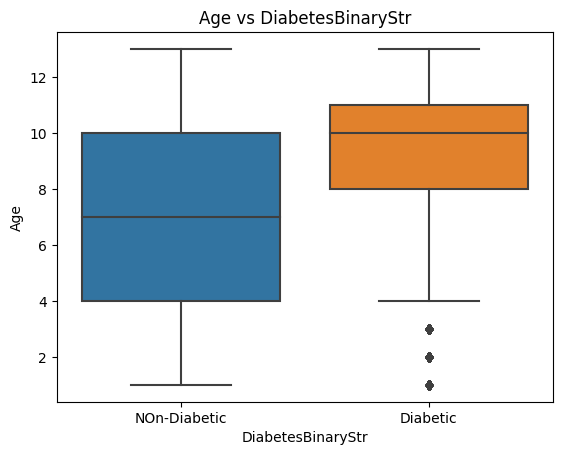

In [18]:
sns.boxplot(x = 'DiabetesBinaryStr', y = 'Age', data = df)
plt.title('Age vs DiabetesBinaryStr')
plt.show()

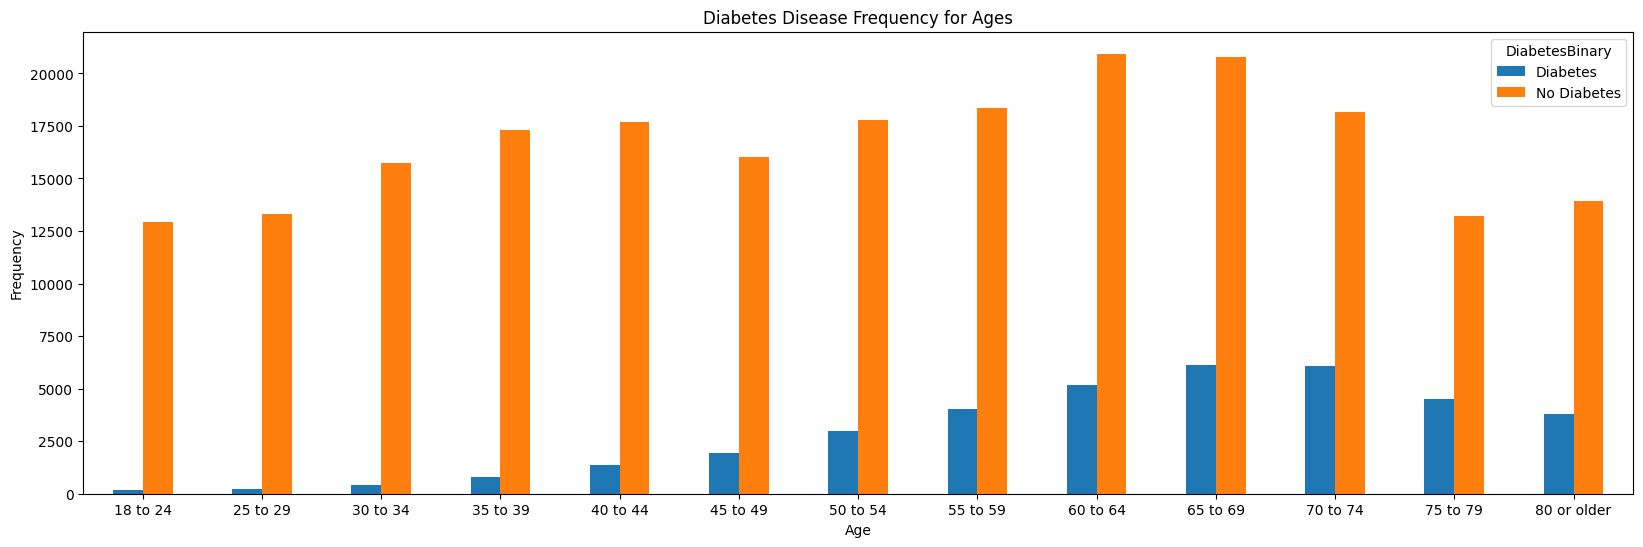

In [19]:
pd.crosstab(df1.Age,df1.DiabetesBinary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From above we concluded that when age increases ,risk of diabetes also increases.
And the median of the age of diabetic people is greater than that of non-diabetic people.

**3.2 RoutineCheckupSpan and Diabetes Binary**

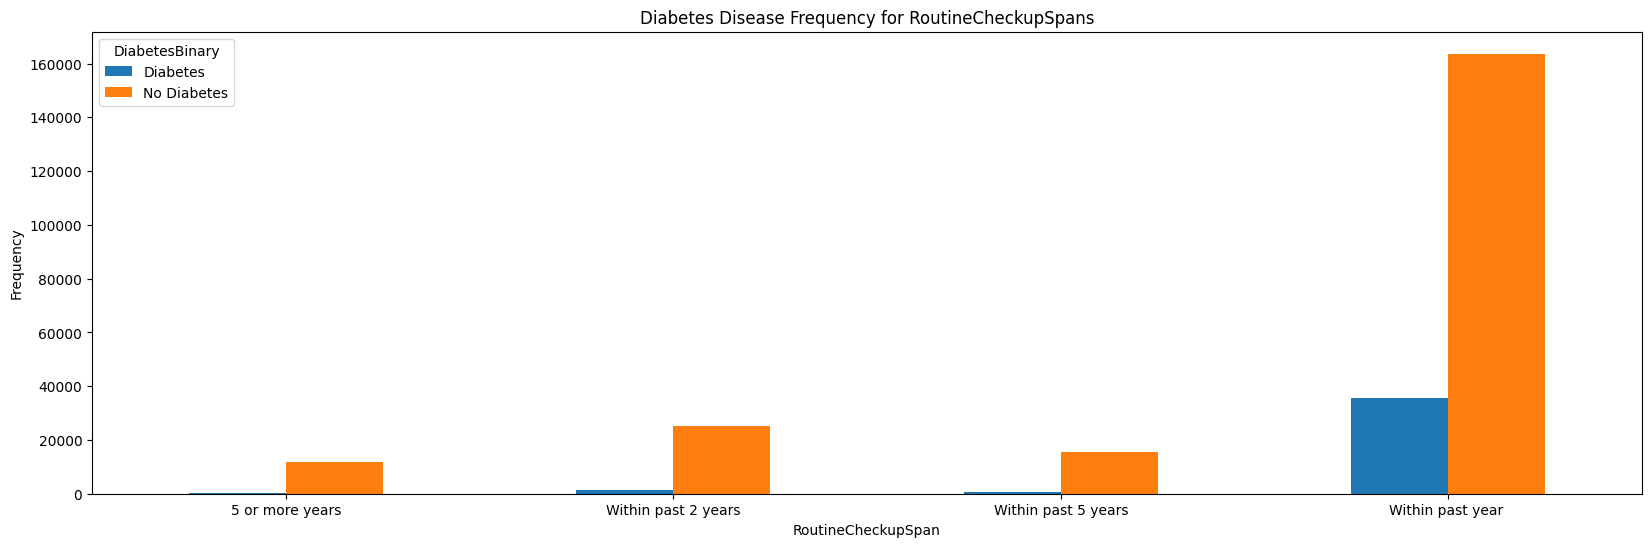

In [20]:
pd.crosstab(df1.RoutineCheckupSpan,df1.DiabetesBinary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for RoutineCheckupSpans')
plt.xlabel('RoutineCheckupSpan')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

This shows that , almost all diabetic patients had  lastt visited a doctor for a routine checkup  within a past year.

**3.3 with HeartDiseaseorAttack**

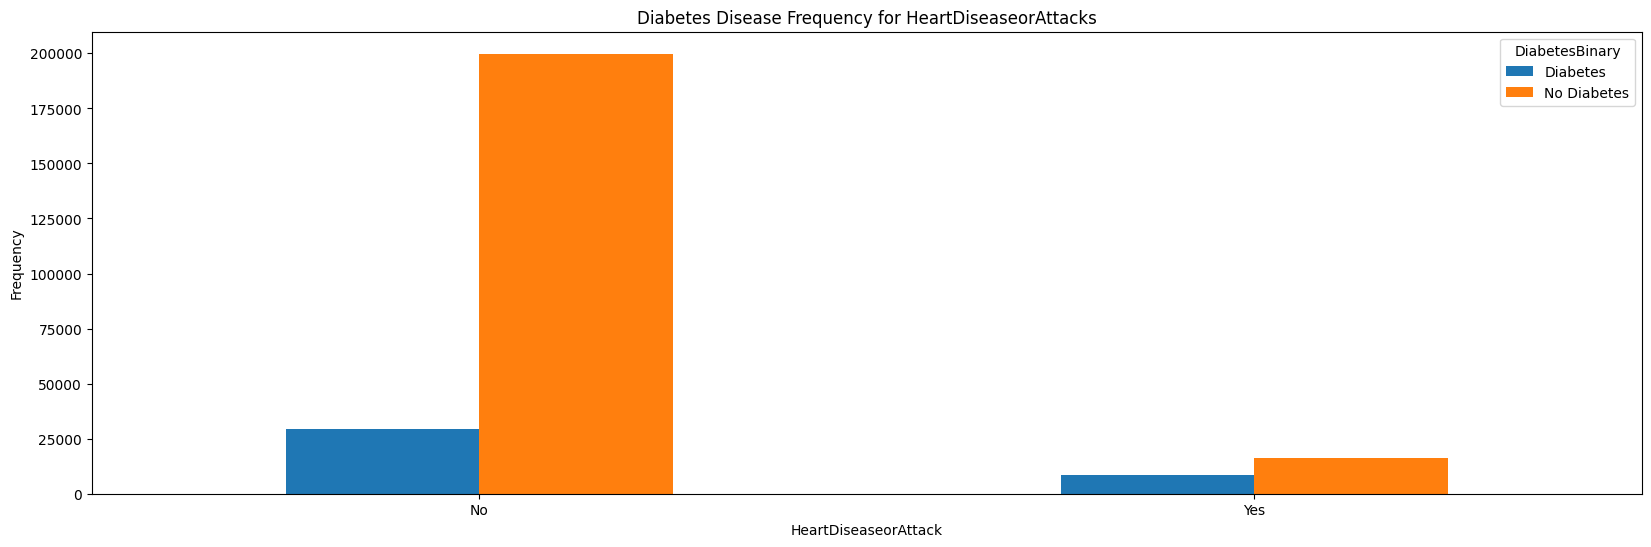

In [21]:
pd.crosstab(df1.HeartDiseaseorAttack,df1.DiabetesBinary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for HeartDiseaseorAttacks')
plt.xlabel('HeartDiseaseorAttack')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

This shows that large amount of diabetic patients were not reported heart disease

**3.4 BMI and Diabetes Binary**

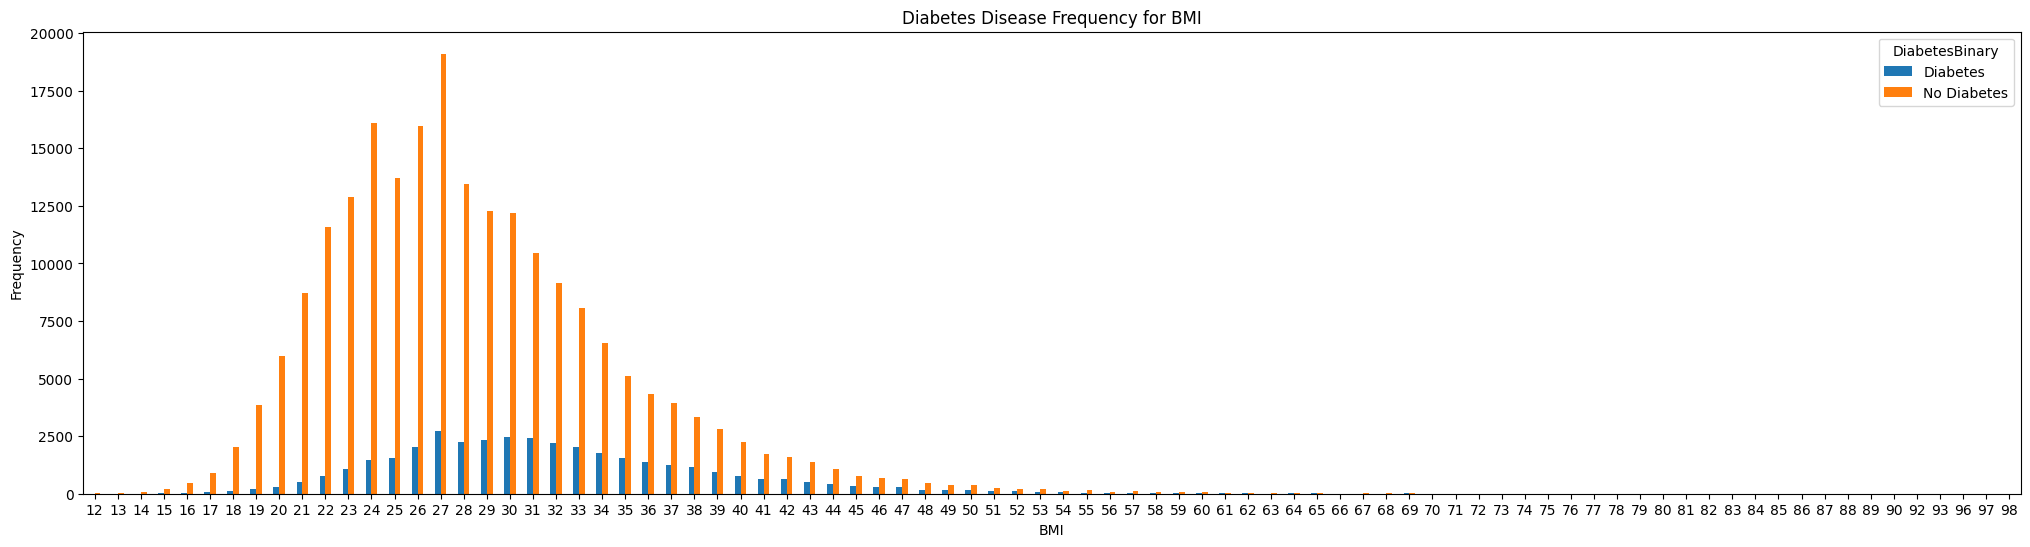

In [22]:
pd.crosstab(df1.BMI,df1.DiabetesBinary).plot(kind="bar",figsize=(25,6))
plt.title('Diabetes Disease Frequency for BMI')
plt.xlabel('BMI')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

As we can see people range between 23-38 BMI have more likely to have Diabetic.

**3.5 With GenHlth**

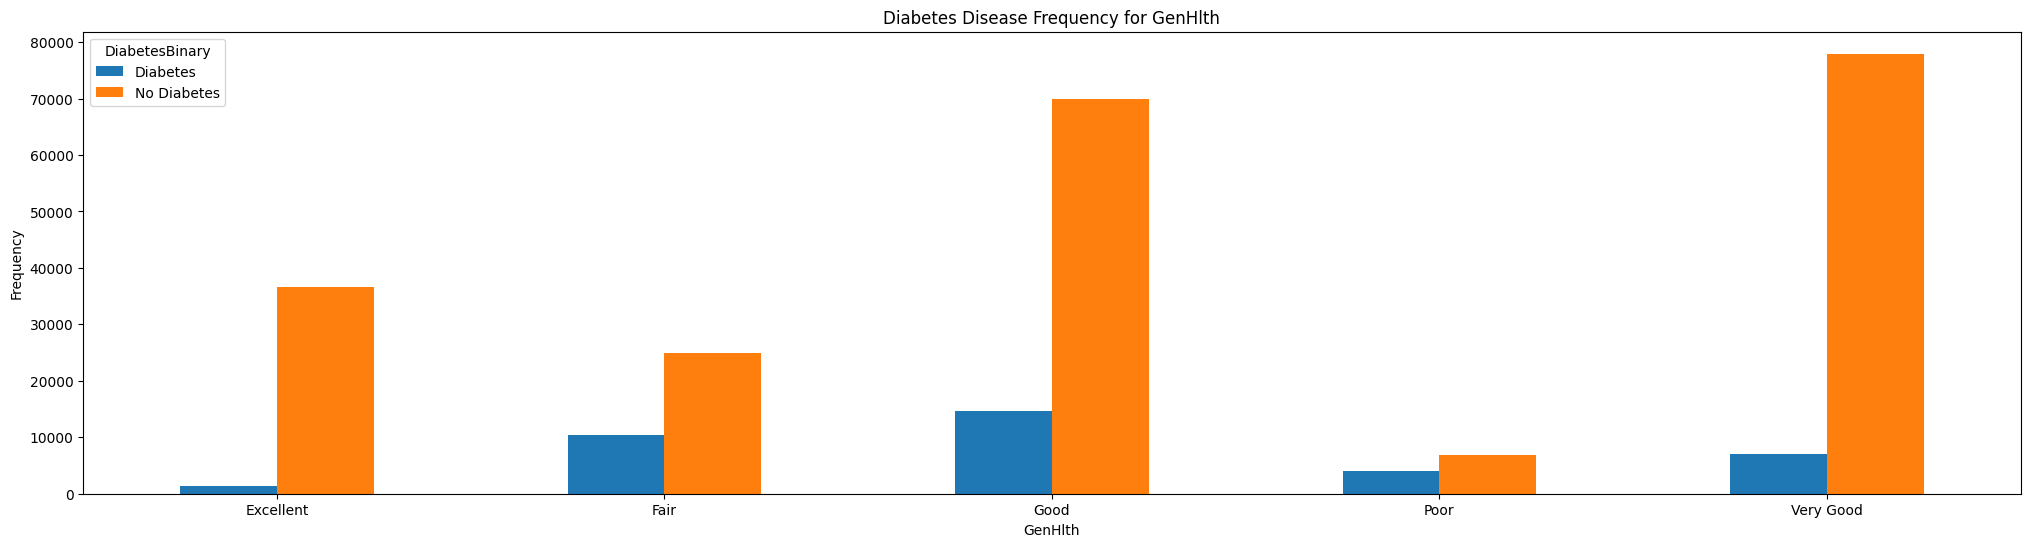

In [23]:
pd.crosstab(df1.GenHlth,df1.DiabetesBinary).plot(kind="bar",figsize=(25,6))
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Here ,we can see percentage of diabetic pateint on a particualar General Health condition is high of poor and fair

**3.6 With Physhlth**

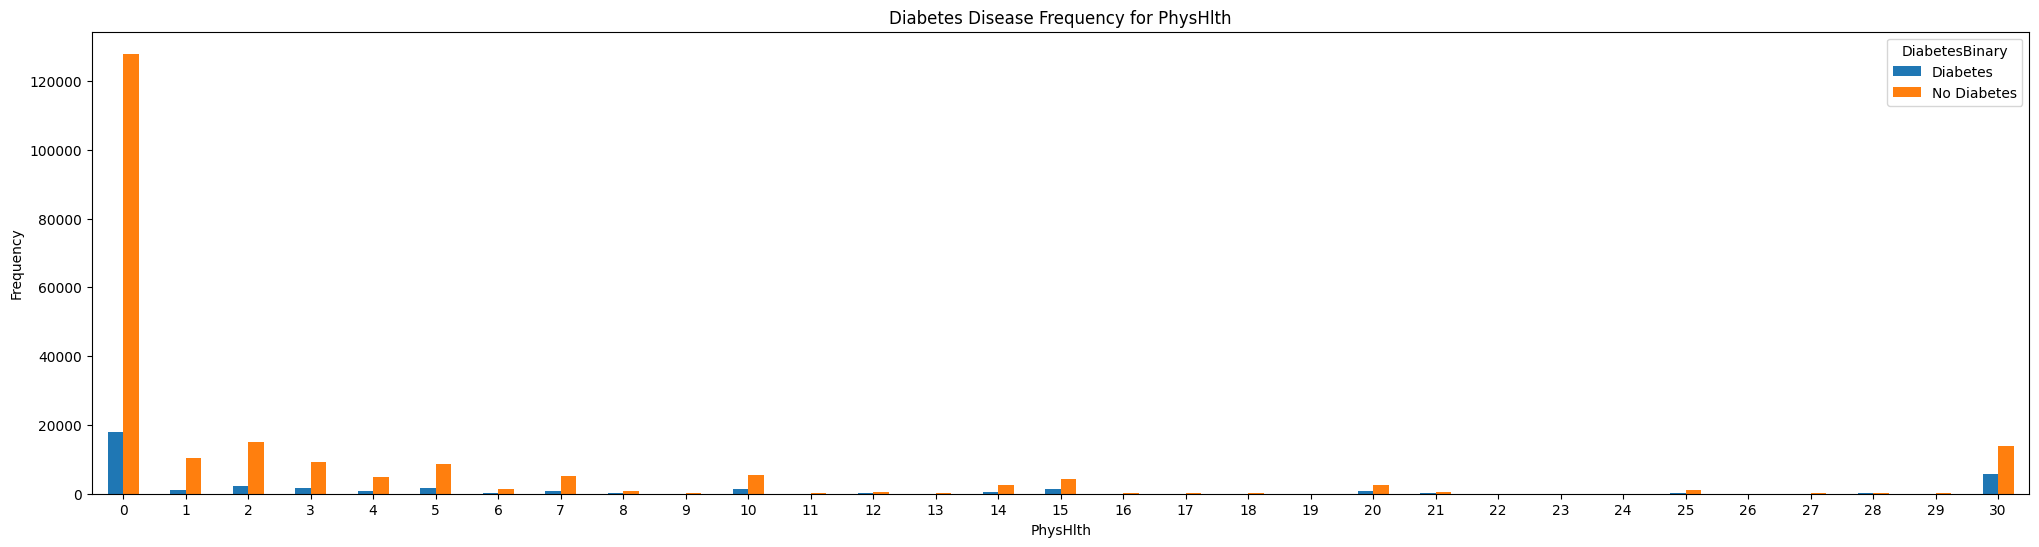

In [24]:
pd.crosstab(df1.PhysHlth,df1.DiabetesBinary).plot(kind="bar",figsize=(25,6))
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that PhysHlth Group 0-5 have impact on Diabetic

**3.7 PhysActivity**

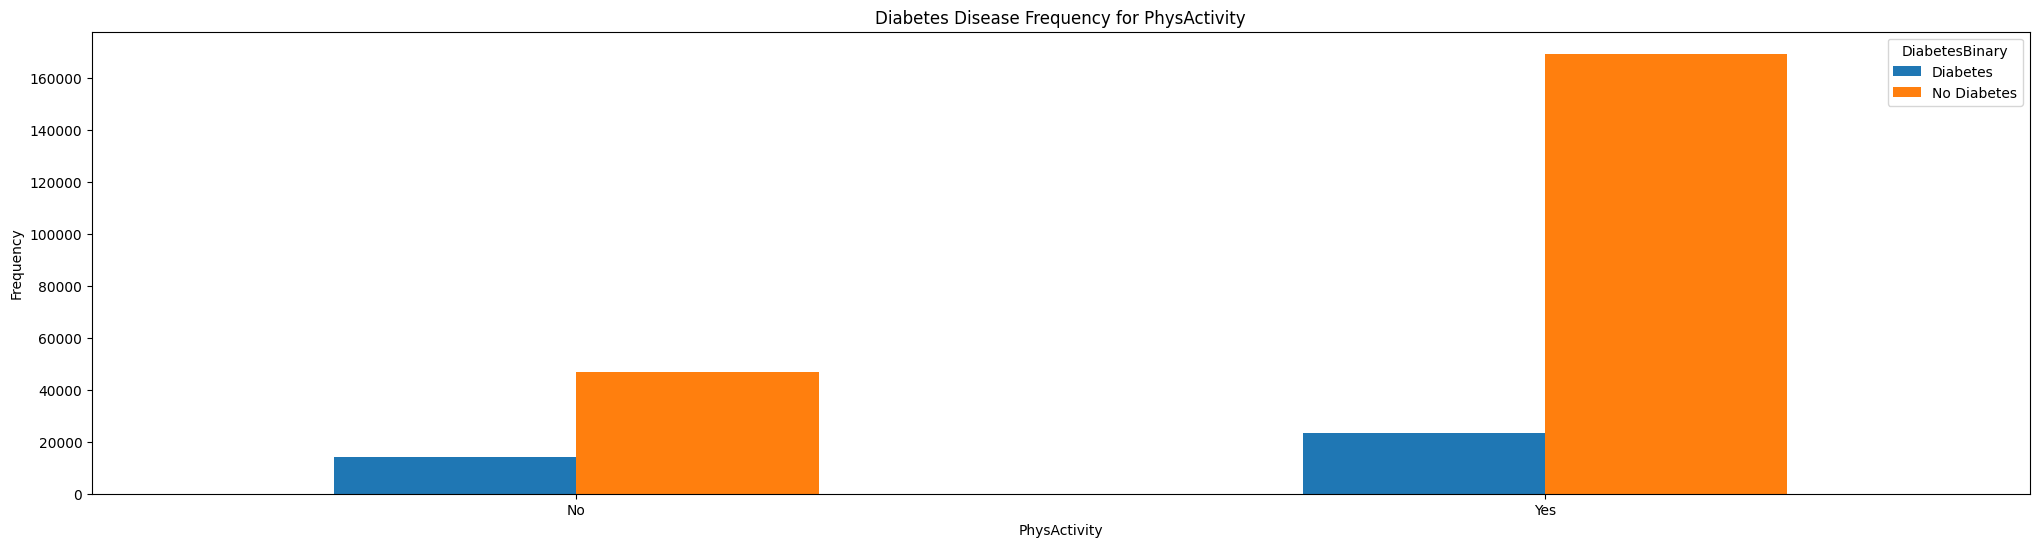

In [25]:
pd.crosstab(df1.PhysActivity,df1.DiabetesBinary).plot(kind="bar",figsize=(25,6))
plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel('PhysActivity')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Percentage of diabetic patients is higher in "No physical activity class"

**3.8 HvyAlcoholConsump**

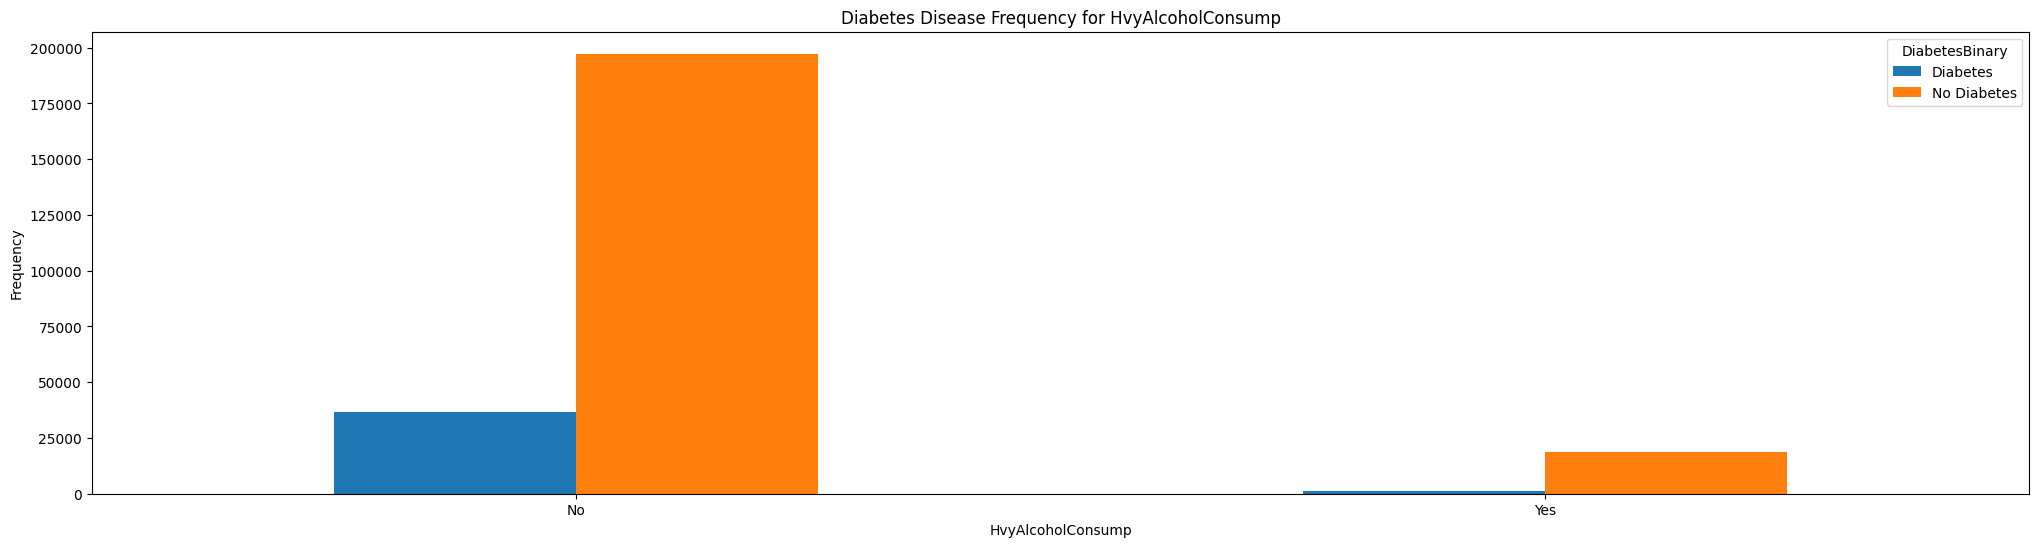

In [26]:
pd.crosstab(df1.HvyAlcoholConsump,df1.DiabetesBinary).plot(kind="bar",figsize=(25,6))
plt.title('Diabetes Disease Frequency for HvyAlcoholConsump')
plt.xlabel('HvyAlcoholConsump')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Here , People who don't have heavy alcohol consumption are more likely be healthier.But , since there is not enough information here about HvyAlcoholConsump so, we can not predict the effect of HvyAlcoholConsump on Diabetes.



**3.9 Income**

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 2000x1000 with 0 Axes>

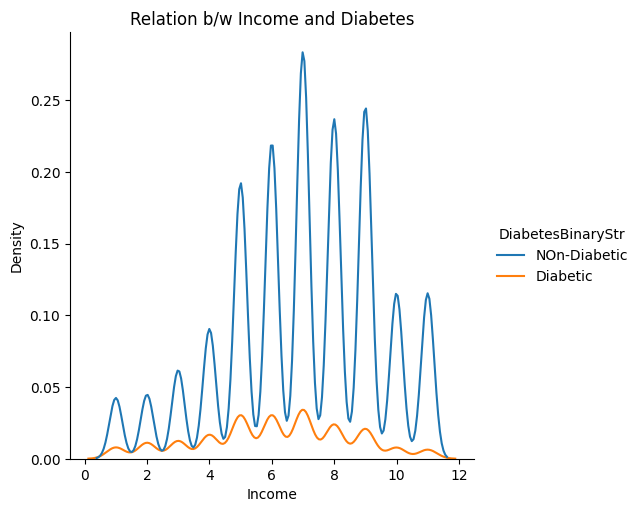

In [27]:
plt.figure(figsize=(20,10))

sns.displot(data=df, x="Income", hue="DiabetesBinaryStr", kind="kde")
plt.title("Relation b/w Income and Diabetes")

Here, we can concluded that in the high level of income , the healthy people is more than others

# **Pre-Processing Continued...**

In [ ]:
df=df.drop('DiabetesBinaryStr', axis=1)

In [51]:
# Separating features and target variable
X = df.drop('DiabetesBinary', axis=1)
y = df['DiabetesBinary']




# **4. Feature selection**

In [63]:
#feature selection using chi square
import sklearn
from sklearn.feature_selection import SelectKBest, chi2
k = 9  # Select top k features
selector = SelectKBest(chi2, k=k)
X_selected= selector.fit_transform(X,y)


df_selected =  pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])


# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]
df_selected =  pd.DataFrame(df_selected,y)
# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)
df_selected.tail()



Selected Features:
Index(['BMI', 'Stroke', 'HeartDiseaseorAttack', 'RoutineCheckupSpan',
       'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income'],
      dtype='object')


BMI  Stroke  HeartDiseaseorAttack  RoutineCheckupSpan  \
DiabetesBinary                                                          
0                26       0                     0                   1   
1                22       0                     0                   1   
0                26       0                     0                   1   
0                26       0                     0                   1   
0                26       0                     0                   1   

                GenHlth  PhysHlth  DiffWalk  Age  Income  
DiabetesBinary                                            
0                     2         2         0    8      10  
1                     4         2         0    5       5  
0                     2         2         0    8      10  
0                     2         2         0    8      10  
0                     2         2         0    8      10

In [64]:
dfSelected=df[['DiabetesBinary','BMI', 'Stroke', 'HeartDiseaseorAttack', 'RoutineCheckupSpan',
       'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']]

**Saving a csv file with selected features**

In [66]:
dfSelected.to_csv('BRFSS22CleanedSelected.csv', sep=",", index=False)